**Classifier 1:**

Accuracy: 0.25

Precision: 0.0625

Recall: 1

F1-Score: 0.118


**Classifier 2:**

Accuracy: 0.93

Precision: 0.4

Recall: 0.8

F1-Score: 0.53

In [12]:
# First classifier
accuracy = 250/1000
precision = 50/(50+750) # TP/(TP+FP)
recall = 50/50 # TP/(TP+FN)
f1 = 2*precision*recall/(precision+recall)

In [13]:
f1

0.11764705882352941

# Evaluating Classifiers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Read the data

In [15]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Split the data into X and y

In [17]:
y = df['Survived']
X = df.drop(columns=['Survived'])

#### Split the data into train and test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [19]:
X_train.shape, X_test.shape

((668, 10), (223, 10))

#### Feature Engineer

In [20]:
df.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [21]:
# This is not the focus of this afternoon, so I will keep it simple
X_train_engineered = X_train[['Pclass', 'SibSp']]

#### Build a dummy classifier

In [22]:
# strategy='most_frequent' creates a model that always predicts the majority class
m_dummy = DummyClassifier(strategy='most_frequent', random_state=10)

In [23]:
m_dummy.fit(X_train_engineered, y_train)

DummyClassifier(random_state=10, strategy='most_frequent')

In [25]:
# m_dummy.predict(X_train_engineered) will always predict the majority class
# In the case of the titanic dataset the majority of people did not survive, hence
# the majority class is 0. The dummy classifier will only predict 0
# It is a control model

# m_dummy.predict(X_train_engineered)

#### Build a simple logistic regression

In [26]:
m_logistic = LogisticRegression(random_state=10)

In [27]:
m_logistic.fit(X_train_engineered, y_train)

LogisticRegression(random_state=10)

In [29]:
# m_logistic.predict(X_train_engineered)

## 1) Accuracy

The first and easiest way to evaluate a classifier is the **accuracy**. It measures which ratio of the observations you classified correctly.

$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} 1(\hat{y}_i = y_i)$

where

$1(\hat{y}_i = y_i) = 
\begin{cases}
    1,& \text{if } \hat{y}_i = y_i\\
    0,              & \text{otherwise}
\end{cases}$

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
ypred_dummy = m_dummy.predict(X_train_engineered)
accuracy_dummy = accuracy_score(y_train, ypred_dummy)
accuracy_dummy

0.6017964071856288

In [32]:
ypred_logistic = m_logistic.predict(X_train_engineered)
accuracy_logistic = accuracy_score(y_train, ypred_logistic)
accuracy_logistic

0.6661676646706587

In [33]:
m_logistic.score(X_train_engineered, y_train)
# <-- .score() returns the accuracy in case of the logistic regression

0.6661676646706587

Is accuracy always a good metric to evaluate your classification?<br>
No, if you have a very imbalanced dataset, a dummy classifier will have a very high accuracy, but will not give you any valuable information.

## 2) Types of Errors and the Confusion Matrix

**False Positive:**<br>
An observation is classified as positive, although it truly is negative

**False Negatives:**<br>
An observation is classified as negative, although it truly is positive

You can plot the different types of errors in a **confusion matrix**.

In [35]:
from sklearn.metrics import plot_confusion_matrix

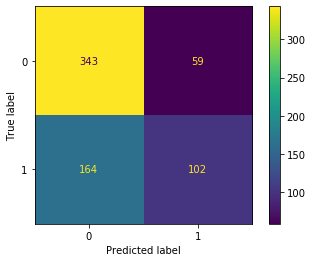

In [36]:
plot_confusion_matrix(m_logistic, X_train_engineered, y_train)

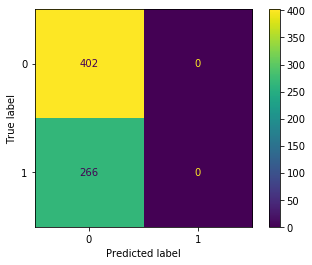

In [37]:
plot_confusion_matrix(m_dummy, X_train_engineered, y_train)

## 3) Precision

$precision = \frac{TP}{TP + FP}$

In [38]:
from sklearn.metrics import precision_score

In [40]:
precision_logistic = precision_score(y_train, ypred_logistic)
precision_logistic

0.6335403726708074

In [42]:
precision_dummy = precision_score(y_train, ypred_dummy)
precision_dummy

0.0

## 4) Recall

$recall = \frac{TP}{TP + FN}$

In [43]:
from sklearn.metrics import recall_score

In [44]:
recall_score(y_train, ypred_logistic)

0.38345864661654133

In [45]:
recall_score(y_train, ypred_dummy)

0.0

## 5) F1-Score

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score(y_train, ypred_logistic)

0.477751756440281

## Question by Max

We have done feature engineering on the training data. Do we have to do the same for the test data or should we not first feature engineer, before we split the data?

- We want to split the data before we feature engineer
- That makes sure that there is no leakage of information from test to training data during the feature engineering process (for example by imputing means using all data)
- The test data should be completely unseen by the model before testing on it

What does that mean for our X_test?

In [49]:
# We have to repeat all steps of feature engineering on the test data
X_test_engineered = X_test[['Pclass', 'SibSp']]

In [51]:
m_logistic.predict(X_test_engineered)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1])